# <Center>Avocado Dataset Analysis and ML Prediction</center>

<img src="images/Avocado.jpg"></img>

# Table of Contents
1. [Problem Statement](#section1)<br/>
2. [Data Loading and Description](#section2)<br/>
3. [Data Cleaning](#section3)<br/>
   3.1 [Understanding the Dataset](#section3.1)<br/>
   3.2 [Profiling](#section3.2)<br/>
   3.3 [Preprocessing](#section3.3)<br/>
4. [Data Visualisation](#section4)<br/>
   4.1 [Which type of Avocados are more in demand (Conventional or Organic)?](#section4.1)<br/>
   4.2 [In which range Average price lies, what is distribution look like?](#section4.2)<br/>
   4.3 [How Average price is distributed over the months for Conventional and Organic Types?](#section4.3)<br/>
   4.4 [In which year and for which region was the Average price the highest?](#section4.4)<br/>
   4.5 [How dataset features are correlated with each other?](#section4.5)<br/>
5. [Feature Engineering for Model building](#section5)<br/>
6. [Model selection/predictions](#section6)<br/>
   6.1 [Average Price prediction using Linear Regression Regressor](#section6.1)<br/>
   6.2 [Average Price prediction using Decision Tree Regressor](#section6.2)<br/>
   6.3 [Average Price prediction using Random Forest Regressor](#section6.3)<br/>
   6.4 [Lets see final Actual Vs Predicted sample.](#section6.4)<br/>
7. [Conclusions](#section7)

## <a id=section1>1. Problem Statement</a>

<ul>
    <li>The notebooks explores the use fo Pandas and EDA for analysis purpose.</li>
    <li>In this notebook we will try to  predict the Avocado’s Average Price based on different features.
        The features are different (Total Bags,Date,Type,Year,Region etc.).</li>
    <li> <b>Categorical: </b>'region','type'</li>
    <li> <b>Date: </b>'Date'</li>
   <li>  <b>Numerical: </b>'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags','XLarge Bags','Year'</li>
<li><b>Target: </b>'AveragePrice' </li>
</ul>

## <a id=section2>2. Data Loading and Description</a>

<p>This data provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The dataset comprises of <b>18249</b> observations of <b>14</b> columns. <br><br>Below is a table showing names of all the columns and their description. </p>
<table align="left">
    <tr>
        <td>Features</td>         
        <td>Description</td>
    </tr>
    <tr>
        <td>Unamed: 0</td>     
        <td>Its just a useless index feature that will be removed later </td>  
    </tr>
    <tr>
        <td>Total Volume</td>        
        <td>Total sales volume of avocados</td> 
    </tr>
    <tr>
        <td>4046</td>  
        <td>Total sales volume of Small/Medium Hass Avocado</td> 
    <tr>
        <td>4225</td>           
        <td>Total sales volume of Large Hass Avocado</td>
    </tr>
    <tr>
        <td>4770</td>            
        <td>Total sales volume of Extra Large Hass Avocado</td>
    </tr>
    <tr>     
        <td>Total Bags</td>  	       
        <td>Total number of Bags sold</td> 
    </tr>
    <tr>
        <td>Small Bags</td>  	        
        <td>Total number of Small Bags sold</td>  
    </tr>
    <tr>
        <td>Large Bags</td>  	       
        <td>Total number of Large Bags sold</td>  
    </tr>
    <tr>
        <td>XLarge Bags</td>  	      
        <td>Total number of XLarge Bags sold</td>
    </tr>
</table>

In [2]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [23]:
df = pd.read_csv("data/avocado.csv")

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## <a id=section3>3. Data Cleaning</a>

<ul><li>Let's analyze and clean the data.</li></ul>

### <a id=section3.1>3.1 Understanding the Dataset</a>

In [7]:
df.shape

(18249, 14)

In [8]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<ul><li> The data set contians <b>18249</b> rows and <b>14</b> columns.</li><ul>

In [11]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<ul><li> We can see all columns having count <b>18249</b>. Looks like it doesn't contain missing values. </li><ul>

In [14]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<ul><li>We can obsrve that, there are <b>no missing values</b> exist in dataset, that's great!</li></ul>

### <a id=section3.2>3.2 Profiling</a>

In [25]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="avocado_before_preprocessing.html")

<img src="images/warning.png"></img>

### <a id=section3.3>3.3 Preprocessing</a>

<ul><li>The Feature <b>"Unnamed:0"</b> is represented as a index, so let's remove it from the dataset!</li></ol>

In [26]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [28]:
#
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [29]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## <a id=section4>4. Data Visualisation</a>

<p><b>Organic vs Conventional :</b> The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset</p>



### <a id=section4.1>4.1 Which type of Avocados are more in demand (Conventional or Organic)?</a>

In [38]:
type=df.groupby('type')['Total Volume'].agg('sum')

values=[type['conventional'],type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])


<ul><li>Just over <b>2%</b> of our dataset is organic. So looks like Conventional is in more demand. Now, let's look at the average price distribution</li></ul>

### <a id=section4.2>4.2 In which range Average price lies, what is distribution look like?</a>

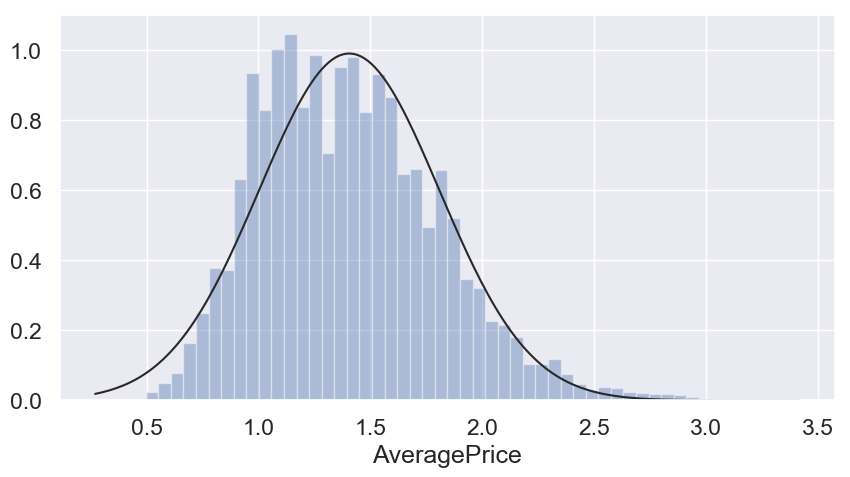

In [55]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

<ul><li>Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.</li></ul>

### <a id=section4.3> 4.3 How Average price is distributed over the months for Conventional and Organic Types?</a>

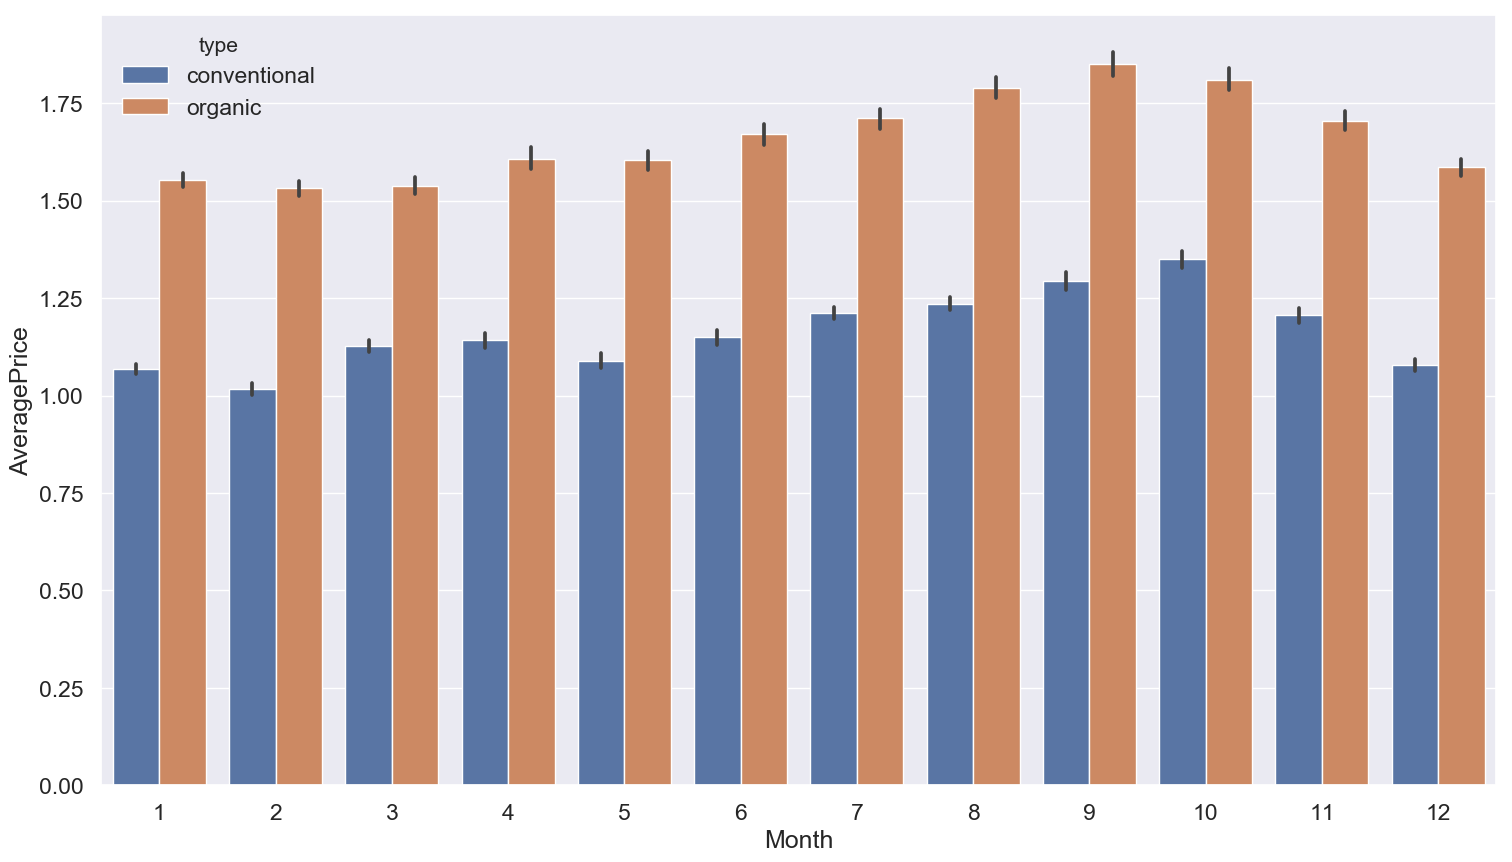

In [52]:
plt.figure(figsize=(18,10))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

<ul><li>Looks like there was a hike between <b>months 8 – 10</b> for both Conventional and Organic type of Avocados prices</li></ul>

### <a id=section4.4>4.4 In which year and for which region was the Average price the highest?</a>

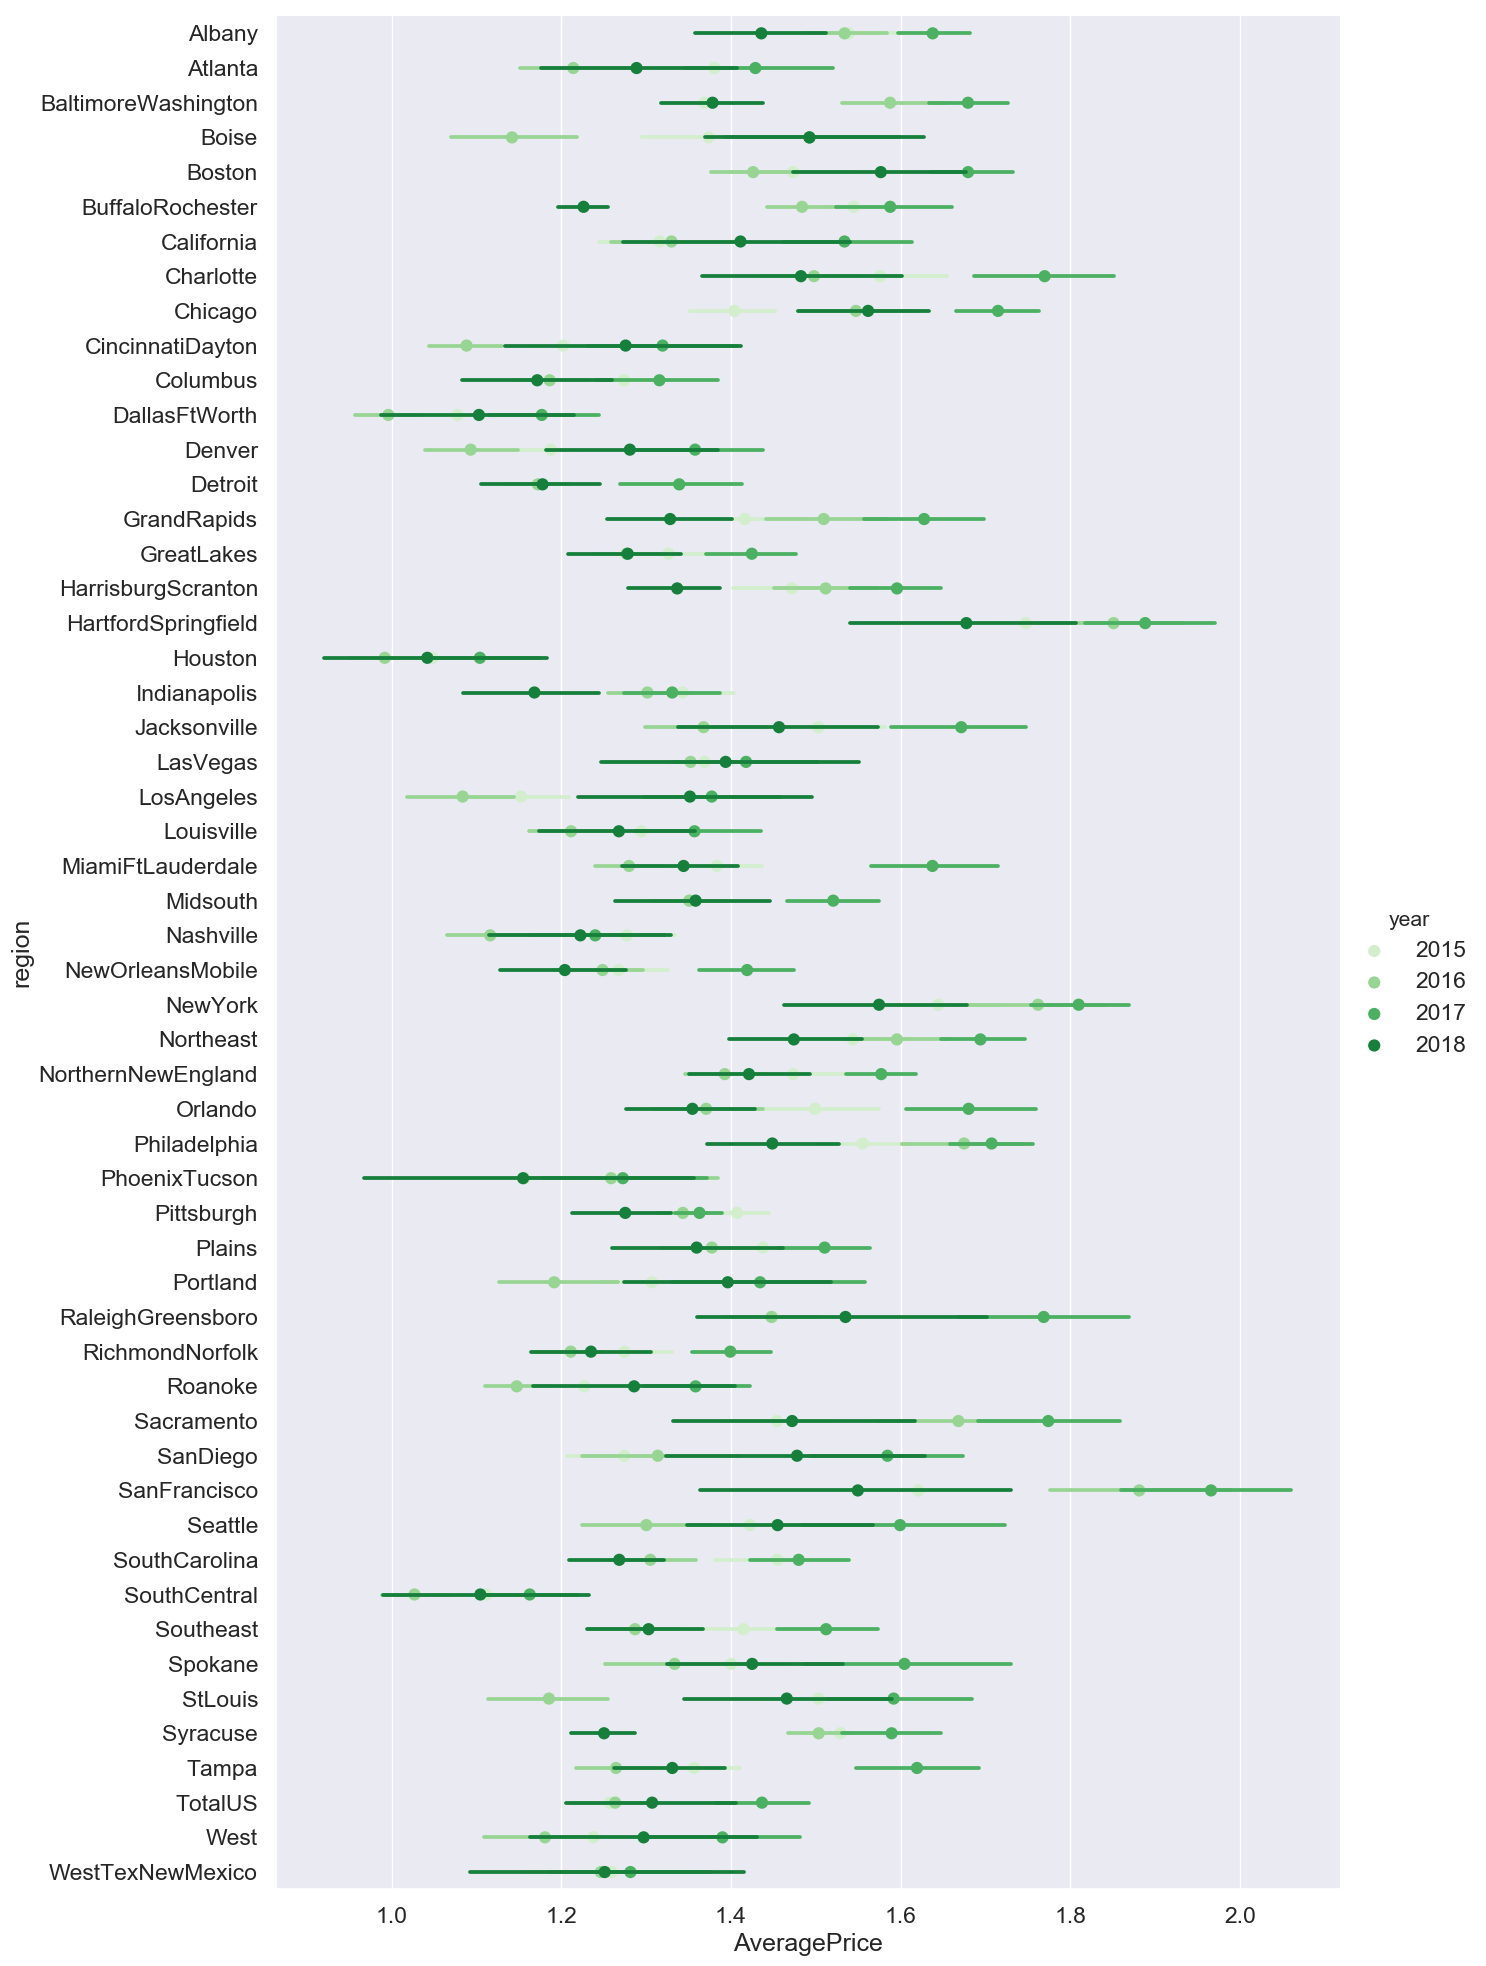

In [64]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=20,
                   aspect=0.7,
                   palette='Greens',
                   join=False,
              )


<ul><li>Looks like there was a <b>huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region</b>.</ul></li>

### <a id=section4.5>4.5 How dataset features are correlated with each other?</a>

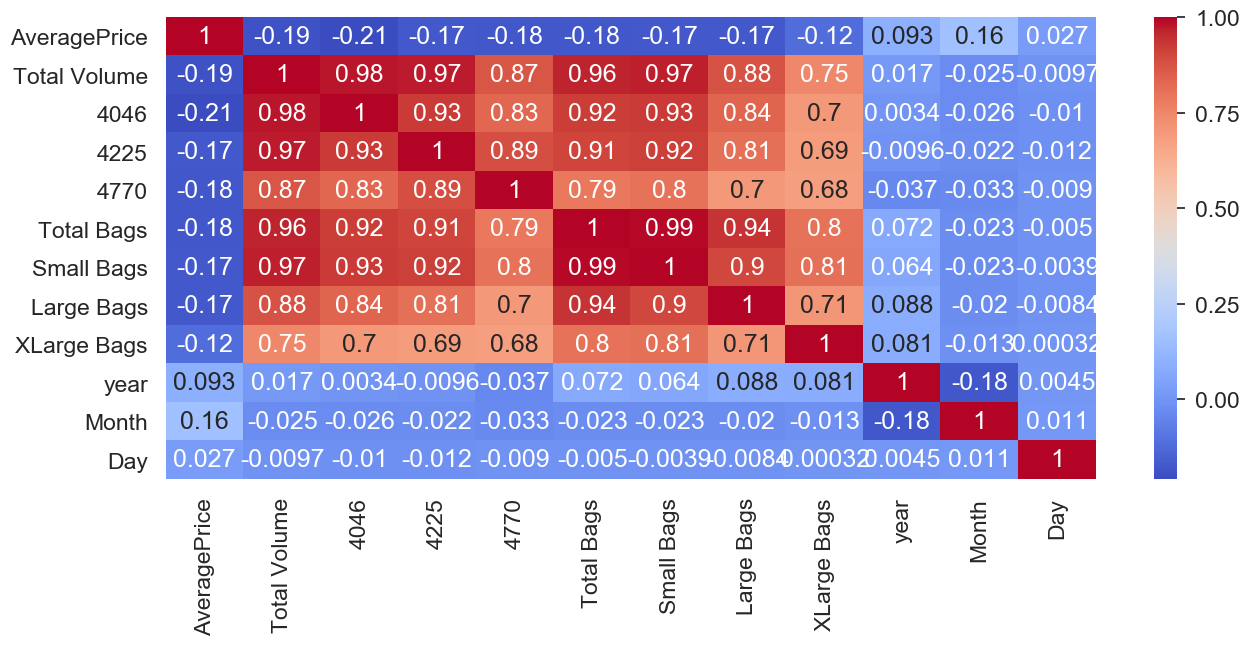

In [70]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<ul><li>As we can see from the heatmap above, all the features are not correleted with the <b>Average Price column</b>, instead most of them are correlated with each other, so we  can say that it is not a good model.</li></ul>

## <a id=section5>5. Feature Engineering for Model building</a>

In [71]:
df['region'].nunique()

54

In [72]:
df['type'].nunique()

2

<ul>
<li>Type has 2 unique values, so it's going to be easy to to transform the type feature into dummies</li> 
<li>Region has 54 unique values, so I decided to drop the entire column.</li>
<li>I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day. </li>
</ul>

In [73]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [74]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


## <a id=section6>6. Model selection/predictions</a>

<ul>
<li>Now our data is ready. Let's apply Linear Regression Algorithm because our Target variable 'AveragePrice' is continuous.</li>
<li>Let's now begin training the regression model! We will need to first split the into an X array that contains the features to train on, and a y array with the target variable.</li>
</ul>

### <a id= section6.1>6.1 Average Price prediction using Linear Regression Regressor</a>

In [91]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [93]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291665678
MSE: 0.09108802805350158
RMSE: 0.3018079323899582


<ul>
    <li>The <b>RMSE is low so we can say that we do have a good model, but lets check to be more sure</b>.</li>
    <li>Lets plot the <b>y_test vs the predictions</b>.</li>
</ul>

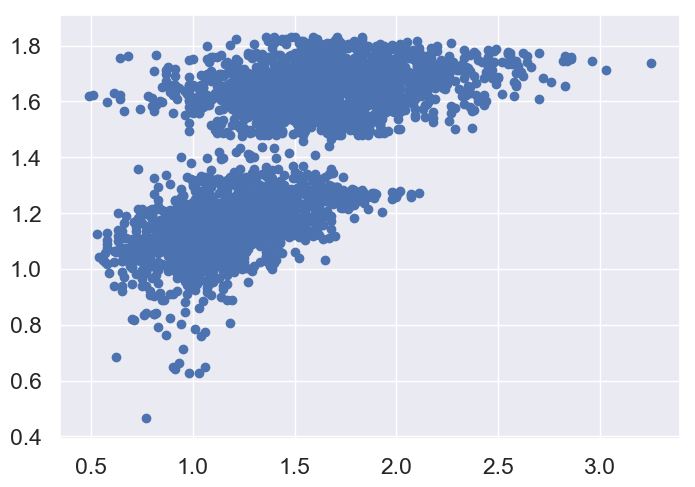

In [82]:
plt.scatter(x=y_test,y=pred)

<ul>
    <li>As we can see that <b>we don't have a straight line so I am not sure that this is the best model we can apply on our data</b>.</li>
    <li>Lets try working with the <b>Decision Tree Regression model</b>.</li>
</ul>

### <a id= section6.2>6.2 Average Price prediction using Decesion Tree Regressor</a>

In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

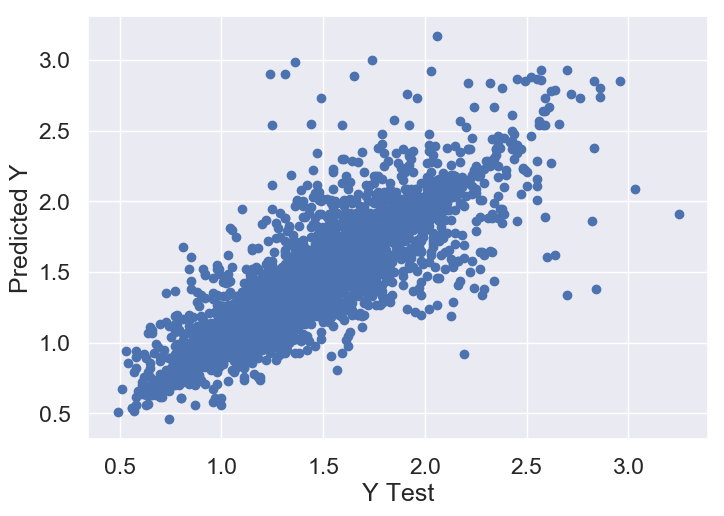

In [96]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<ul><li>Nice, here we can see that <b>we nearly have a straight line, in other words its better than the Linear regression model, and to be more sure lets check the RMSE</b>.

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1373123287671233
MSE: 0.046453890410958903
RMSE: 0.2155316459616984


<ul><li>Very Nice, <b>RMSE is lower than as comapred to Linear Regression</b>.</li>
    <li>Now let's try one last model to see if the predictions are improved. For this, we will use <b>Random Forest Regressor<b>.</li></ol>

### <a id= section6.3>6.3 Average Price prediction using Random Forest Regressor</a>

In [99]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10660109589041096
MSE: 0.024027293698630138
RMSE: 0.15500739885124884


<ul><li>Well as we can see the <b>RMSE is lower than the two previous models</b>, so the <b>Random Forest Regressor is the best model in this case</b>.</li></ul>

Text(0, 0.5, 'Predicted Y')

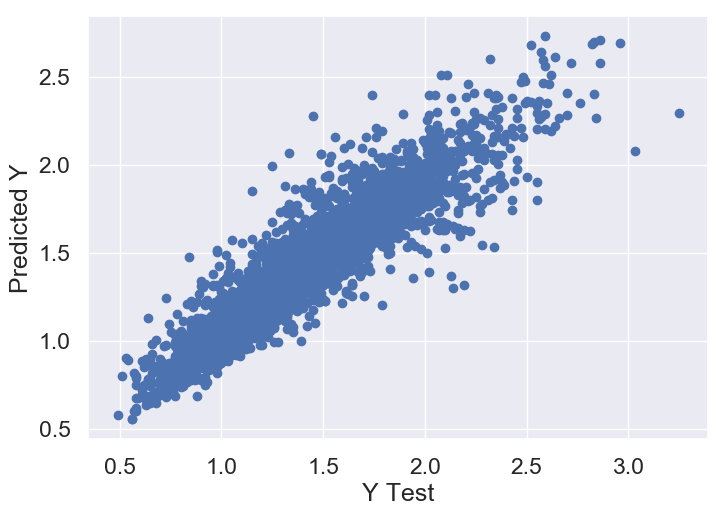

In [100]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### <a id=section6.4>6.4 Lets see final Actual Vs Predicted sample.<a/>

,Y Test,Pred
8604,0.82,0.918
2608,0.97,1.026
14581,1.44,1.416
4254,0.97,0.905
16588,1.45,1.444


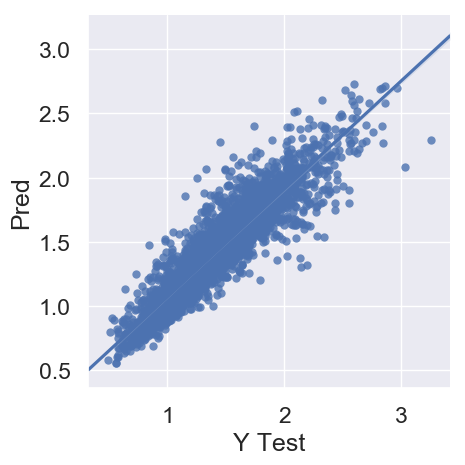

In [122]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head(5)

## <a id=section7>7. Conclusions</a>

<ul>
<li>Used Pandas and other plotting libraries like matplotlib, plotly and seaborn for EDA.</li>
<li>Used profiler for data cleaning and identifying missing and incorrect values present in the data.</li>
<li>Used dummification for categorical values like type.</li>
<li>The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly correlated with.</li>
<li>Used various algorithms to know which model will work better with the help of low RMSE scores.</li>
<li>This project helped me to gain lots of insights on how to choose the best model for predcition.</li>
<li>Also get to know how to use Linear Regression, Decision Tree and Random Forest models to fine tune the predictions.</li>
</ul>